### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데 이 터 : fish.csv
- 피쳐/특성 : 무게
- 라벨/타겟 : 길이
- 학습 방법 : 지도학습 + 예측 => KNN 기반의 회귀
- 학습/테스트 데이터 : 7:3으로 준비

#### 전처리

In [614]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

In [615]:
file = '../data/fish.csv'
data = pd.read_csv(file,usecols=[0,1,2])
data

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [616]:
mask = (data['Species'] == 'Perch')
perchDF = data[mask].reset_index(drop=True)
perchDF

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


In [617]:
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [618]:
perchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [619]:
perchDF.shape

(56, 3)

In [620]:
perchDF.duplicated().sum()

# 1개정도는,, 괜찮지 않을까? ㅎ

1

#### 데이터셋 준비하기

In [621]:
# 피처와 타겟 분리해보자
feature = perchDF[['Weight']]
target = perchDF['Length']

In [622]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [623]:
from sklearn.model_selection import train_test_split

In [624]:
#이렇게 하면 계속 랜덤으로 바뀐다.
#X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3)

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3, random_state = 123)
# random_state 값을 아무값이나 줘야 데이터가 고정이 된다. (randome에 seed 주듯이)
# 이걸 배웠던가,,,,,,,,,,,,,,,,,,,ㅜ

In [625]:
X_train

,Weight
12,125.0
47,850.0
30,300.0
1,32.0
6,78.0
29,218.0
52,1000.0
44,900.0
31,260.0
51,1100.0


In [626]:
# 학습 및 테스트 데이터셋 확인해보자
print(f"[학습용]")
print(f"X_train.shape:{X_train.shape}")
print(f"y_train.shape:{y_train.shape}")
print(f"[테스트용]")
print(f"X_test.shape:{X_test.shape}")
print(f"y_test.shape:{y_test.shape}")

[학습용]
X_train.shape:(39, 1)
y_train.shape:(39,)
[테스트용]
X_test.shape:(17, 1)
y_test.shape:(17,)


In [627]:
import matplotlib.pyplot as plt

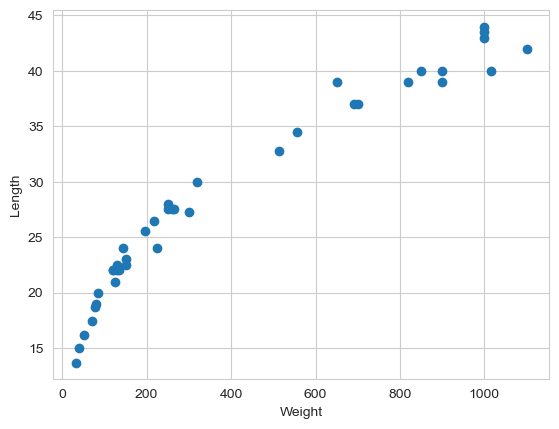

In [628]:
plt.scatter(X_train,y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [629]:
# 스케일링을 해보자
from sklearn.preprocessing import StandardScaler

In [630]:
scaler = StandardScaler()
scaler

StandardScaler()

In [631]:
scaler.fit(X_train)

StandardScaler()

In [632]:
# 스케일링 진행 - 학습용
scaled_X_train = scaler.transform(X_train)
scaled_X_train

array([[-0.79003189],
       [ 1.28861248],
       [-0.28829015],
       [-1.05667179],
       [-0.92478539],
       [-0.52339199],
       [ 1.71867683],
       [ 1.43196726],
       [-0.40297397],
       [ 2.0053864 ],
       [-0.50332232],
       [-0.80436737],
       [ 0.32526833],
       [ 1.20259961],
       [-0.9190512 ],
       [-0.7183545 ],
       [ 1.71867683],
       [-1.00076342],
       [-0.94772215],
       [-0.77569641],
       [ 1.43196726],
       [-0.23094823],
       [-0.80436737],
       [ 1.76168326],
       [-0.73268998],
       [ 0.82987717],
       [ 1.71867683],
       [-0.90471572],
       [-0.38863849],
       [-0.43164493],
       [-0.7183545 ],
       [ 0.85854812],
       [-0.77569641],
       [-0.76136093],
       [ 0.44568635],
       [-0.43164493],
       [-0.583601  ],
       [-1.03373502],
       [ 0.71519334]])

In [633]:
# 스케일링 진행 - 테스트용
scaled_X_test = scaler.transform(X_test)
scaled_X_test

# 흠 오류가 난다. 그러면 스케일링 없이 일단 해볼까? 

array([[-0.83303832],
       [-0.77569641],
       [ 1.20259961],
       [-0.60940486],
       [ 0.85854812],
       [-0.63234163],
       [ 2.0053864 ],
       [-0.28829015],
       [ 1.25994152],
       [-0.73268998],
       [ 0.81554169],
       [-0.81870285],
       [-1.13150298],
       [-0.86170928],
       [-0.83303832],
       [-0.66101258],
       [-0.90471572]])

#### 학습

In [634]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model

KNeighborsRegressor()

In [635]:
# X_train_df = pd.DataFrame(X_train)
# X_test_df = pd.DataFrame(X_test)

In [636]:
# 학습
model.fit(X_train,y_train)

KNeighborsRegressor()

#### 검증(테스트)

(6) 테스트 <hr>
- 제대로 만들어진 모델인지 확인하는 과정
    * 훈령용 데이터에 대한 점수
    * 테스트용 데이터에 대한 점수
    * 훈련 점수와 테스트 점수 비교
        - 훈련점수 > 테스트 점수 : 과대적합 (Overfitting)
        - 훈련점수 ≒ 테스트 점수 : 최적적합
        - 훈련점수 ▼ 테스트 점수 ▼ : 과소적합 (Underfitting) 

In [637]:
# 검증
# 정확한 모델인가 검사해보자 (답안지가 있는 데이터를 해보자 => train_data)
train_score = model.score(X_train,y_train)
train_score

0.9784324917738143

In [638]:
# 정확한 모델인가 검사해보자 ( => test_data)
test_score = model.score(X_test,y_test)
test_score

0.9304591558079884

In [639]:
# train_score와 test_score 를 비교했을때 이정도 차이나니까 ~ 적합으로 계속 진행하겠다. 아니면 전처리를 좀 더 해보겠다.

In [640]:
# 앗! 나는 완전히 새로운 데이터로 했다! 그게 아니었다.
# 내가 학습시킨게 실제와 얼마나 다른가 확인해보는게 쟁점

y_pre = model.predict(perchDF[['Weight']])
y_pre = np.round(y_pre, 1)
y_pre

# KNN으로 학습시킨 모델로 예측값을 구해보았다.

array([16.2, 16.2, 16.2, 16.2, 18.3, 20.3, 18.3, 18.3, 18.3, 18.3, 21.9,
       21.9, 21.9, 21.9, 21.9, 21.9, 21.9, 22.3, 21.9, 21.9, 22.7, 22.7,
       22.7, 23.4, 26.3, 22.7, 24.3, 24.3, 24.3, 26.3, 28. , 26.9, 27.6,
       26.9, 26.9, 28. , 28. , 36.1, 36.1, 39. , 37.3, 37.3, 37.3, 37.3,
       40.2, 36.1, 39. , 40.2, 40.2, 42.5, 39. , 42.5, 41.9, 42.5, 41.9,
       41.9])

#### 성능평가

In [641]:
# 그 예측값이 정말 타당할까? 성능평가해보자
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [642]:
print('모델설명도')
print(f"결정계수값(R2) : {r2_score(perchDF.Length, y_pre)}")
print('에러')
print(f"평균제곱오차(MAE) : {mean_squared_error(perchDF.Length, y_pre)}")
print(f"평균절대값오차(MSE) : {mean_absolute_error(perchDF.Length, y_pre)}")

모델설명도
결정계수값(R2) : 0.9648585271453892
에러
평균제곱오차(MAE) : 2.8091071428571435
평균절대값오차(MSE) : 1.0946428571428573


In [643]:
# 회귀는 중요한게 얼마나 그 예상값에 가까이 나온건가가 쟁점

In [644]:
# 이제 과소적합인지 과대적합인지 적정적합인지 확인이 필요하다. 
# 적정적합인지까지 확인을 하면 믿을만한거!

In [645]:
# 예측 (새로운 무게의 데이터를 입력)
new_data = pd.DataFrame([[30]])
predict_result = model.predict(new_data)

C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 최고의 K값을 향하여 ...

In [646]:
# 최고의 K 값을 찾아보자
max_k = X_train.shape[0]
max_k

39

In [647]:

train_scorelist = []
test_scorelist = []
for k in range(1,11):
    model = KNeighborsRegressor(n_neighbors=k)
    # 학습 진행
    model.fit(X_train, y_train)
    # 평가 진행
    train_scorelist.append(model.score(X_train,y_train))
    test_scorelist.append(model.score(X_test, y_test))

In [648]:
# 확인해보자
print(train_scorelist)
print(test_scorelist)

[0.9990339619351278, 0.9943760483990024, 0.9896616037464883, 0.9836669126761037, 0.9784324917738143, 0.9804015027589056, 0.9785539549598375, 0.9769800676313342, 0.9722085160411309, 0.9665609143971378]
[0.9471411138489381, 0.9410604267645315, 0.9403094645695753, 0.932089258740868, 0.9304591558079884, 0.9242377244912939, 0.9164310546751637, 0.9012079866487376, 0.8876066298805805, 0.8787221037566311]


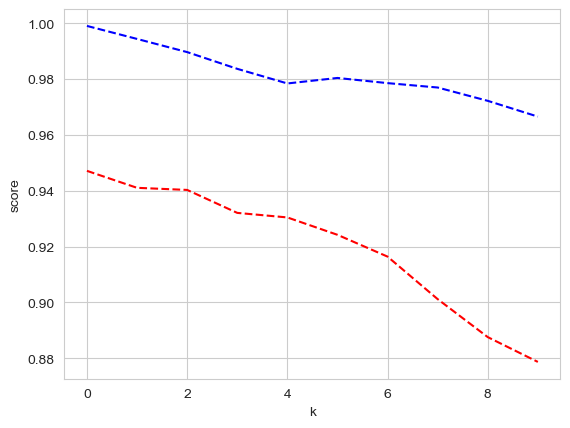

In [649]:
plt.plot(train_scorelist, 'b--')
plt.plot(test_scorelist, 'r--')
plt.xlabel('k')
plt.ylabel('score')
plt.show()


#random_state 값에 따라 최적의 k가 달라진다.
#122, 123일땐 1
#150일땐 6